In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmer-penguins-dataset-for-eda/penguins.csv


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
df = pd.read_csv('/kaggle/input/palmer-penguins-dataset-for-eda/penguins.csv')

In [26]:
# Print the columns of the dataframe
print(df.columns)

# View the initial 5 rows of a DataFrame
df.head()

# Get the summary statistics for numerical columns.
df.describe()

print(df.shape)

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')
(333, 9)


* check for nulls, NaN, empty columns 
* remove the rows with empty values 

In [27]:
# Return number of missing values in each column
missing_values = df.isnull().sum()
print("# missing values:\n", missing_values)

# Return empty values in each column
empty_values = (df == '').sum()
print("# empty values in each column: \n", empty_values)

print("Shape of dataframe before removing missing value rows", df.shape)

# missing values:
 id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64
# empty values in each column: 
 id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64
Shape of dataframe before removing missing value rows (333, 9)


In [19]:
# Since some columns contain missing values,
# we will remove those rows.

df = df.dropna()
df = df[~(df == '').any(axis=1)]

print("Shape of dataframe after removing missing value rows", df.shape)

Shape of dataframe after removing missing value rows (333, 9)


**Visualization 1**: We visualize penguin species distribution across islands to understand habitat preferences and detect changes in populations, indicating potential environmental impacts or habitat shifts.

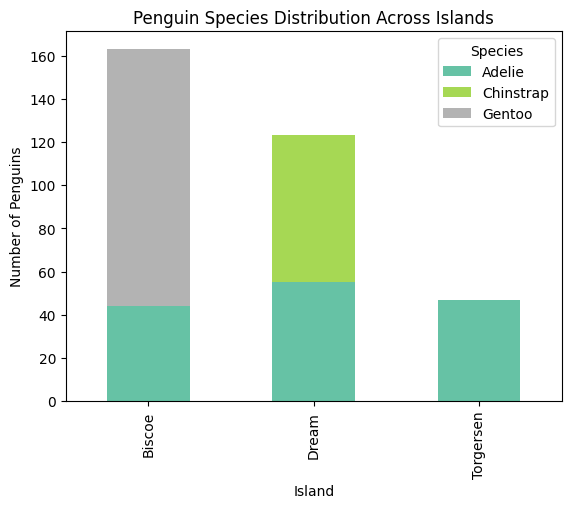

In [20]:
species_distribution = df.groupby(['island', 'species']).size().unstack()

# Using stacked bar plot
species_distribution.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Penguin Species Distribution Across Islands')
plt.xlabel('Island')
plt.ylabel('Number of Penguins')
plt.legend(title='Species')
plt.show()

**Visualization 2:** We plot the penguin population by year to identify periods of growth or decline in their numbers in the given dataset. Note that this may not represent the exact number of penguins, as the dataset contains only 344 records for the years 2007, 2008, and 2009.

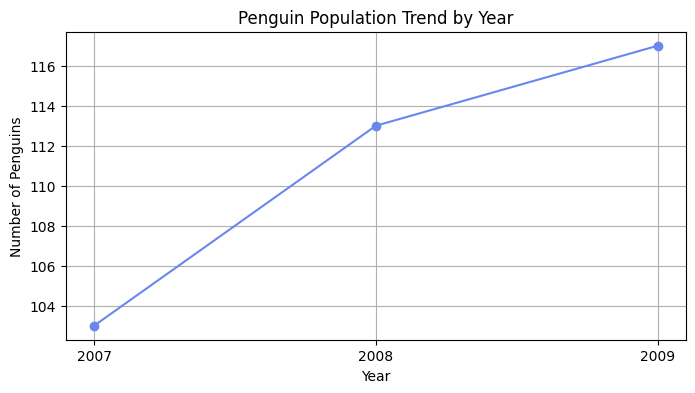

In [8]:
yearly_counts = df.groupby('year').size()
sns.set_palette("coolwarm")

# Using line plot for trend
plt.figure(figsize=(8, 4))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Penguin Population Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Penguins')
plt.grid(True)

plt.xticks(yearly_counts.index)
plt.show()

> **In addition to the EDA, I performed a comparative analysis of Logistic Regression and Random Forest Classifier using the Palmer Penguins Dataset for EDA, utilizing features such as bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g to predict the penguin species. The goal was to gain insights into how each model handles different aspects of the data and identify which model provides the better accuracy, precision, recall, or other relevant metrics.**

In [24]:
# Encode the 'species' column
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Based on the features we predict species using Random Forest Classifier
# features : 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'

features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evalulation of the model
# using accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print('Random Forest Classifier Accuracy:',accuracy)
print('Random Forest Classifier Classification Report:')

print(report)

Random Forest Classifier Accuracy: 0.97
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        48
   Chinstrap       1.00      0.87      0.93        23
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



**Here are the insights I derived from the penguin dataset using Random Forest Classifier:**
* The model achieved a high accuracy of 97% in predicting penguin species with the features.
* It performed good for Gentoo with 100% scores in precision, recall, and F1-score.
* For Adelie the model had a recall of 100% but a slightly lower precision of 94%.
* Chinstrap predictions were precise at 100% but the model failed to correctly identify 13% of the actual penguins that were Chinstrap species.
* Macro and weighted averages were very high, demonstrating strong overall performance and effective handling of class imbalances.

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print('Logistic Regression Accuracy:', accuracy_log_reg)
print('Logistic Regression Classification Report:')
print(report_log_reg)

Logistic Regression Accuracy: 0.99
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00        29

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



**Summary of the experiment: When compared to the Random Forest Classifier, Logistic Regression is the better model in this case.**

* Logistic Regression outperforms with higher accuracy (99% vs. 97%). 
* It shows consistent accuracy with low false positives and negatives. 
* The higher macro average for precision, recall, and F1-score indicates better performance across all classes. 
* Logistic Regression also has a better weighted average, reflecting improved performance across the dataset. 
* The model effectively classifies penguin species and handles class imbalance well.

